In [50]:
%matplotlib inline
import pandas as pd
from getdist import plots
from getdist import MCSamples

import matplotlib.pyplot as plt
import numpy as np
from cosmosis.postprocess import parser
from cosmosis.postprocessing.inputs import read_input
from cosmosis.postprocessing.postprocess import postprocessor_for_sampler
from cosmosis.postprocessing.plots import (
    MetropolisHastingsPlots2D,
    MetropolisHastingsPlots1D,
)


import math
from IPython.display import display, Math


In [61]:
%matplotlib inline
def generate_triangle_plot(data_path, params):
    """
    Generates a triangle plot for given parameters from the specified data path.
    
    Parameters:
        data_path (str): Path to the input data.
        params (list of tuples): List of tuples containing parameter names and fiducial values.
    """
    
    data_c = [read_input(data_path)][0]
    names = [param[0] for param in params]
    labels = [rf"{param[0]}" for param in params]  # LaTeX-style labels
    fiducial_values = {param[0]: param[1] for param in params}
    
    settings = {
        "mult_bias_correction_order": 0,
        "smooth_scale_2D": 3,
        "smooth_scale_1D": 3,
        "boundary_correction_order": 0,
    }
    data_so = [[line[i] for i in range(len(params))] for line in data_c[1]["data"][1][0]]
    sample_red = MCSamples(samples=np.array(data_so), names=names, labels=labels, settings=settings)
    sample_red.removeBurn(0.4)
    print(len(sample_red.samples), " samples")
    # Triangle plot
    g = plots.get_subplot_plotter()
    g.triangle_plot(
        [sample_red],
        filled=True,
        alphas=[0.8, 0.55],
        contour_ls="-",
        contour_lws=1,
        fine_bins=1,
        marker_args={"linewidth": 4},
        markers=fiducial_values,
    )
    plt.savefig(f'{data_path.replace('number_counts_samples.txt','triangle_plot.png')}')
    plt.show()

    for param_name in names:
        display(Math(sample_red.getInlineLatex(param_name, limit=1)))
    return data_so

LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_wazp_gaussian/cosmodc2_wazp_counts/outputs_both/output_rp/number_counts_samples.txt
Removed no burn in
81000  samples


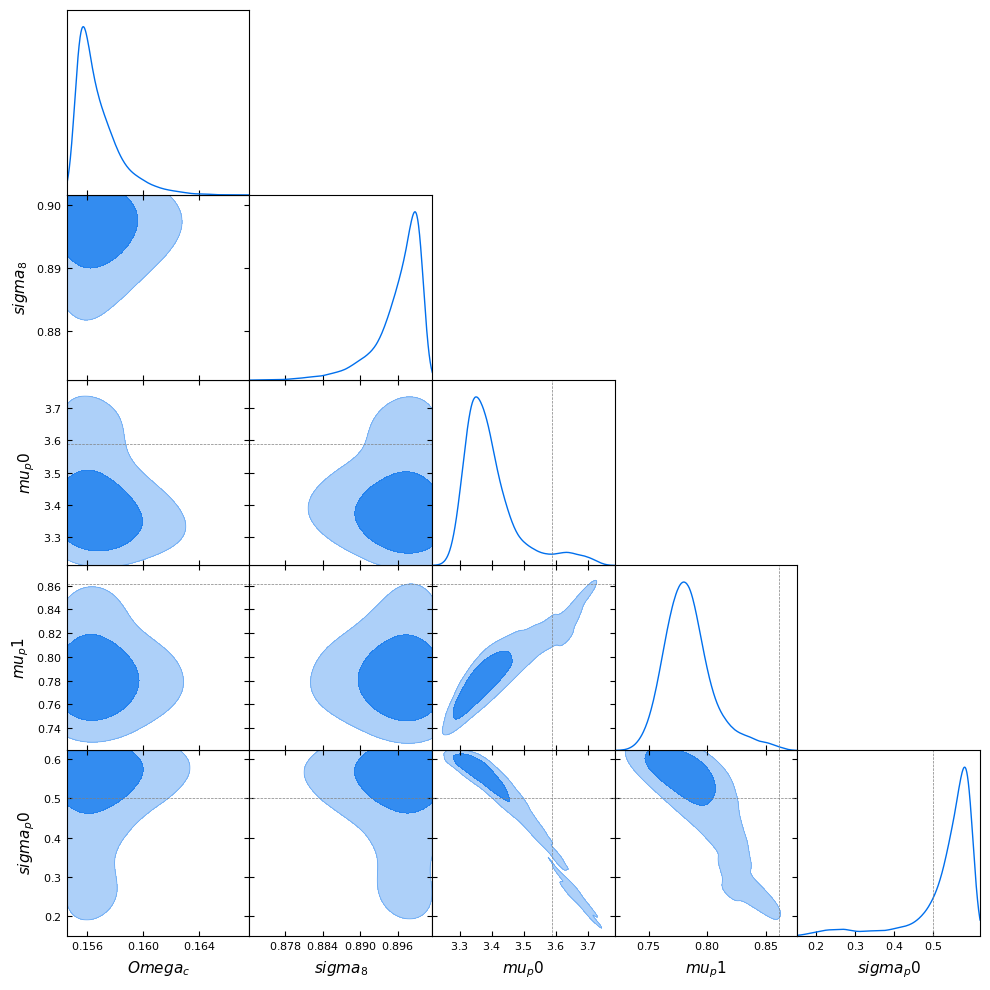

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_wazp_gaussian/cosmodc2_wazp_counts/outputs_mor/output_rp/number_counts_samples.txt
Removed no burn in
76800  samples


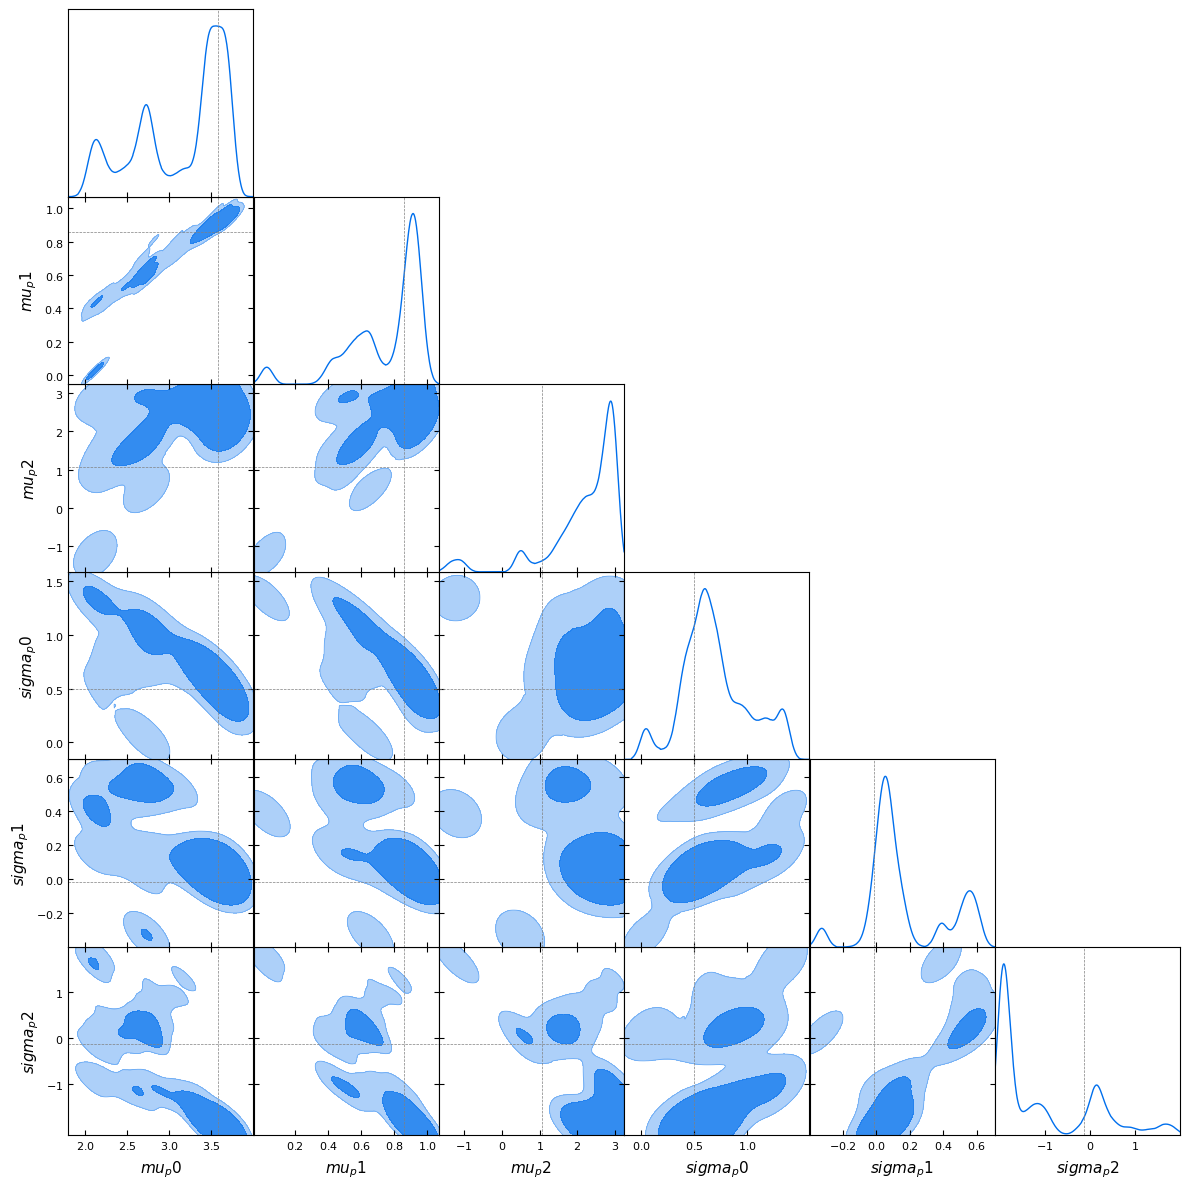

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_wazp_gaussian/cosmodc2_wazp_counts/outputs_cosmo/output_rp/number_counts_samples.txt
Removed no burn in
64800  samples


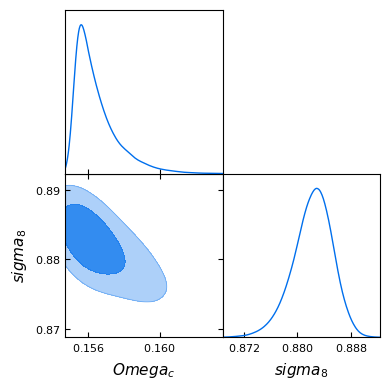

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[[np.float64(0.25510838698495053), np.float64(0.8501215961047596)],
 [np.float64(0.25538974707828294), np.float64(0.8502863898131766)],
 [np.float64(0.25511684943528307), np.float64(0.8496853521259492)],
 [np.float64(0.25495632964198905), np.float64(0.8498079619883161)],
 [np.float64(0.2551898011607293), np.float64(0.849782009165965)],
 [np.float64(0.25565580497290974), np.float64(0.8498403732970301)],
 [np.float64(0.25539880338222226), np.float64(0.8497510702502514)],
 [np.float64(0.25480861951815037), np.float64(0.8498219672716169)],
 [np.float64(0.2549486181016448), np.float64(0.8498388489442248)],
 [np.float64(0.2553675816335121), np.float64(0.8499973660514152)],
 [np.float64(0.2551395071129429), np.float64(0.8496353747408248)],
 [np.float64(0.2551866954253829), np.float64(0.8500605577004633)],
 [np.float64(0.25506177811819636), np.float64(0.8499928405165523)],
 [np.float64(0.2550827973871432), np.float64(0.8499138692236703)],
 [np.float64(0.25553424291528715), np.float64(0.8500883

In [62]:
###Change the home path to yours
home = '/sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_wazp_gaussian/cosmodc2_wazp_counts'

generate_triangle_plot(home + "/outputs_both/output_rp/number_counts_samples.txt", [
    ("Omega_c", 0.22),
    ("sigma_8", 0.800),
    ("mu_p0",3.58716),
    ("mu_p1", 0.861),
    ("sigma_p0", 0.5),
])

generate_triangle_plot(home + "/outputs_mor/output_rp/number_counts_samples.txt", [
    ("mu_p0",3.58716),
    ("mu_p1", 0.861),
    ("mu_p2", 1.07),
    ("sigma_p0", 0.5),
    ("sigma_p1", -0.0131),
    ("sigma_p2", -0.13137)
])

generate_triangle_plot(home + "/outputs_cosmo/output_rp/number_counts_samples.txt", [
    ("Omega_c", 0.22),
    ("sigma_8", 0.800),
])



LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_wazp_gaussian/cosmodc2_wazp_counts_noc/outputs_both/output_rp/number_counts_samples.txt
Removed no burn in
12000  samples


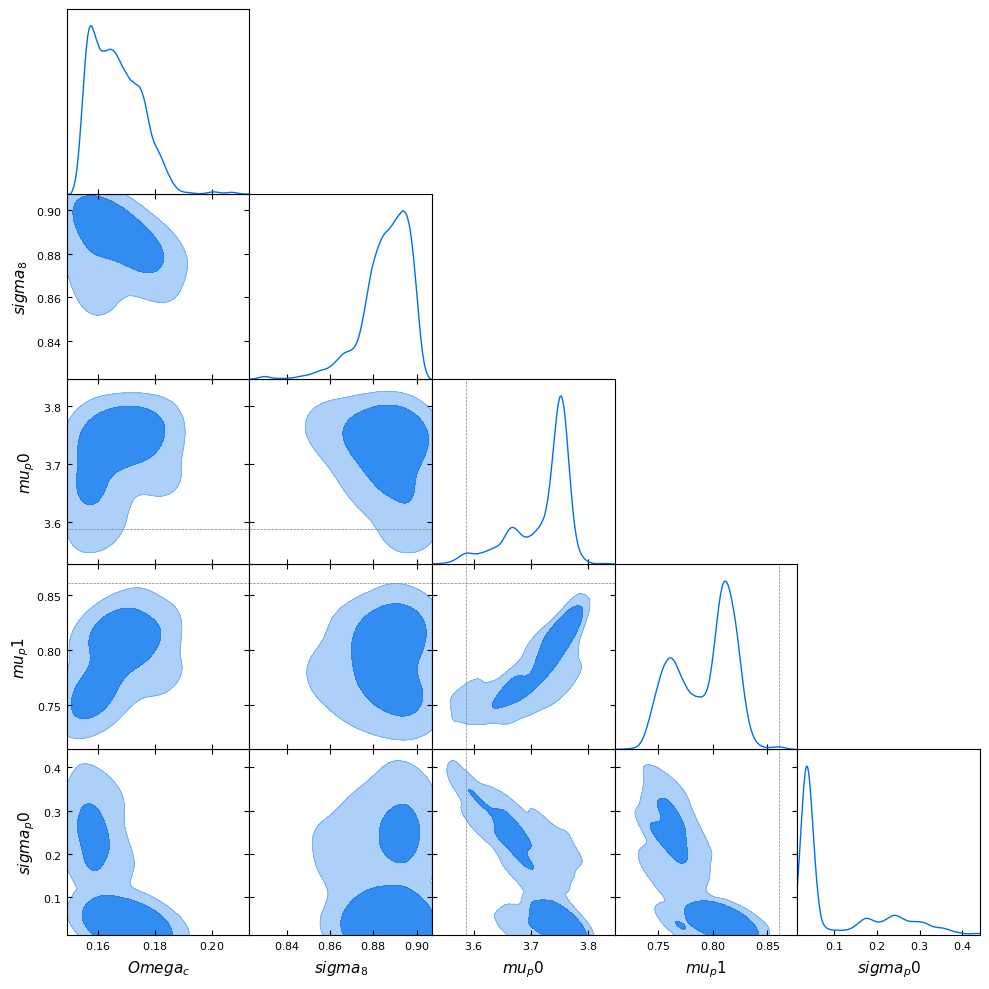

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_wazp_gaussian/cosmodc2_wazp_counts_noc/outputs_mor/output_rp/number_counts_samples.txt
Removed no burn in
10800  samples


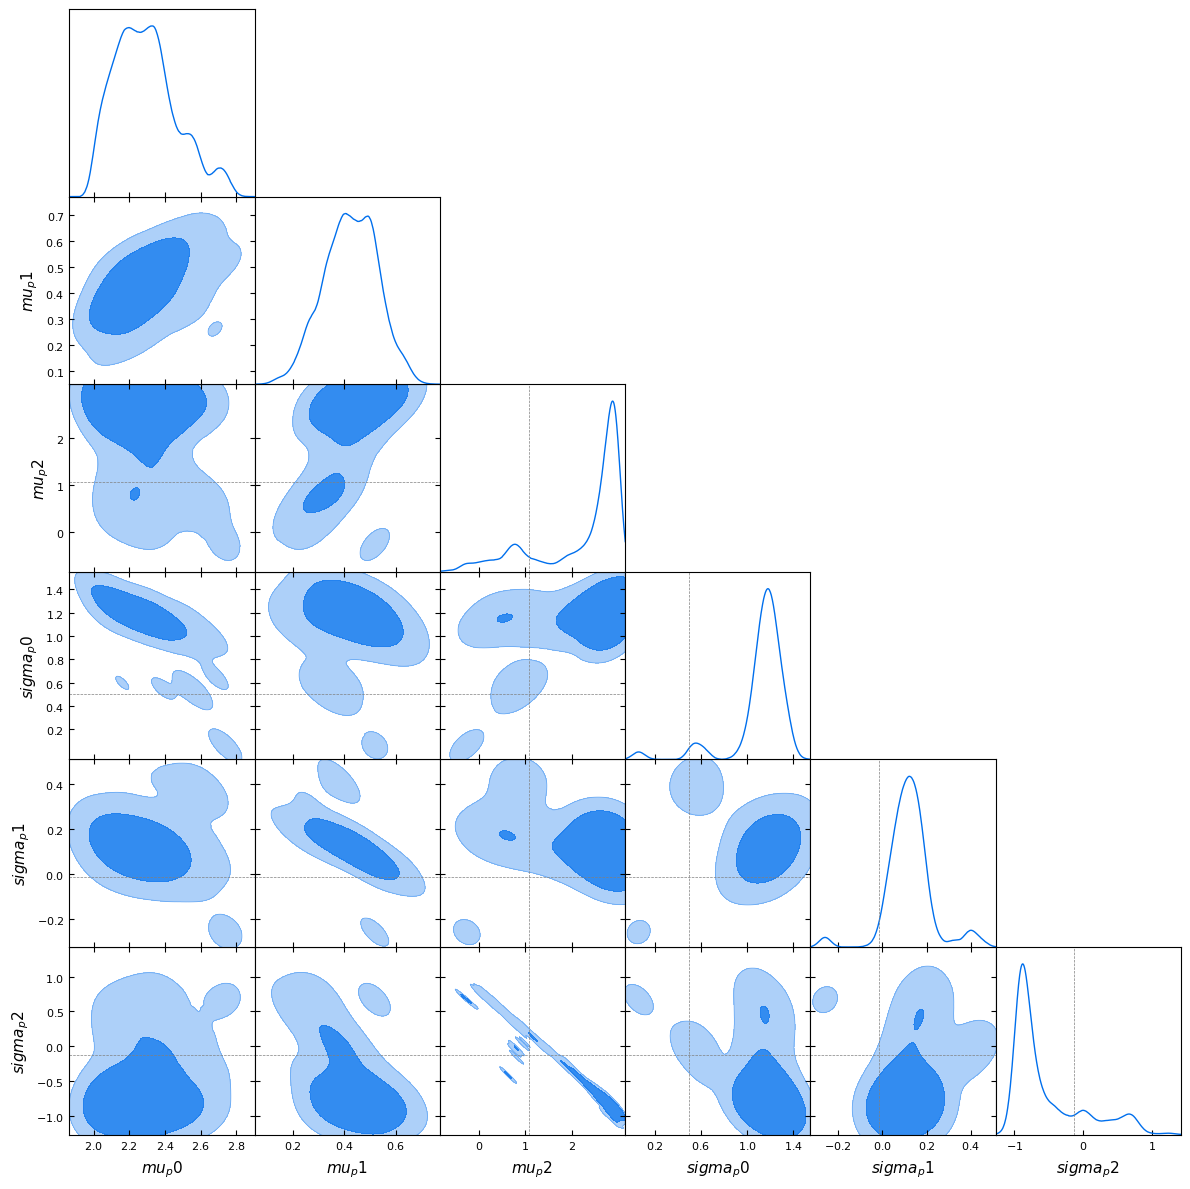

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_wazp_gaussian/cosmodc2_wazp_counts_noc/outputs_cosmo/output_rp/number_counts_samples.txt
Removed no burn in
10200  samples


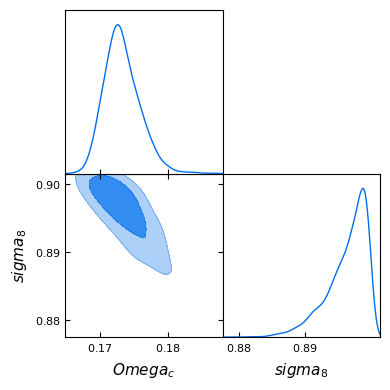

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[[np.float64(0.25555539935602256), np.float64(0.8490582288211087)],
 [np.float64(0.2551300209706786), np.float64(0.8498073088724497)],
 [np.float64(0.25541813975914), np.float64(0.8498165506874185)],
 [np.float64(0.25521403576992835), np.float64(0.8501022572623644)],
 [np.float64(0.2541838383706485), np.float64(0.8504823127677945)],
 [np.float64(0.2552956891456108), np.float64(0.8498329441237077)],
 [np.float64(0.25511776901790323), np.float64(0.8501270287109418)],
 [np.float64(0.255065830866372), np.float64(0.8500828504119283)],
 [np.float64(0.2552469303152059), np.float64(0.8499267447266518)],
 [np.float64(0.25507490660221727), np.float64(0.8499531301315096)],
 [np.float64(0.2552349242334608), np.float64(0.8495776525315896)],
 [np.float64(0.2551757349501284), np.float64(0.8500317275636987)],
 [np.float64(0.25509846796694774), np.float64(0.8499894271522593)],
 [np.float64(0.2552624978790862), np.float64(0.8497626262518861)],
 [np.float64(0.25517862818727044), np.float64(0.849846303326

In [63]:
###Change the home path to yours
home = '/sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_wazp_gaussian/cosmodc2_wazp_counts_noc'

generate_triangle_plot(home + "/outputs_both/output_rp/number_counts_samples.txt", [
    ("Omega_c", 0.22),
    ("sigma_8", 0.800),
    ("mu_p0",3.58716),
    ("mu_p1", 0.861),
    ("sigma_p0", 0.5),
])

generate_triangle_plot(home + "/outputs_mor/output_rp/number_counts_samples.txt", [
    ("mu_p0",3.58716),
    ("mu_p1", 0.861),
    ("mu_p2", 1.07),
    ("sigma_p0", 0.5),
    ("sigma_p1", -0.0131),
    ("sigma_p2", -0.13137)
])

generate_triangle_plot(home + "/outputs_cosmo/output_rp/number_counts_samples.txt", [
    ("Omega_c", 0.22),
    ("sigma_8", 0.800),
])



LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_wazp_gaussian/cosmodc2_wazp_counts_nocp/outputs_both/output_rp/number_counts_samples.txt
Removed no burn in
14700  samples


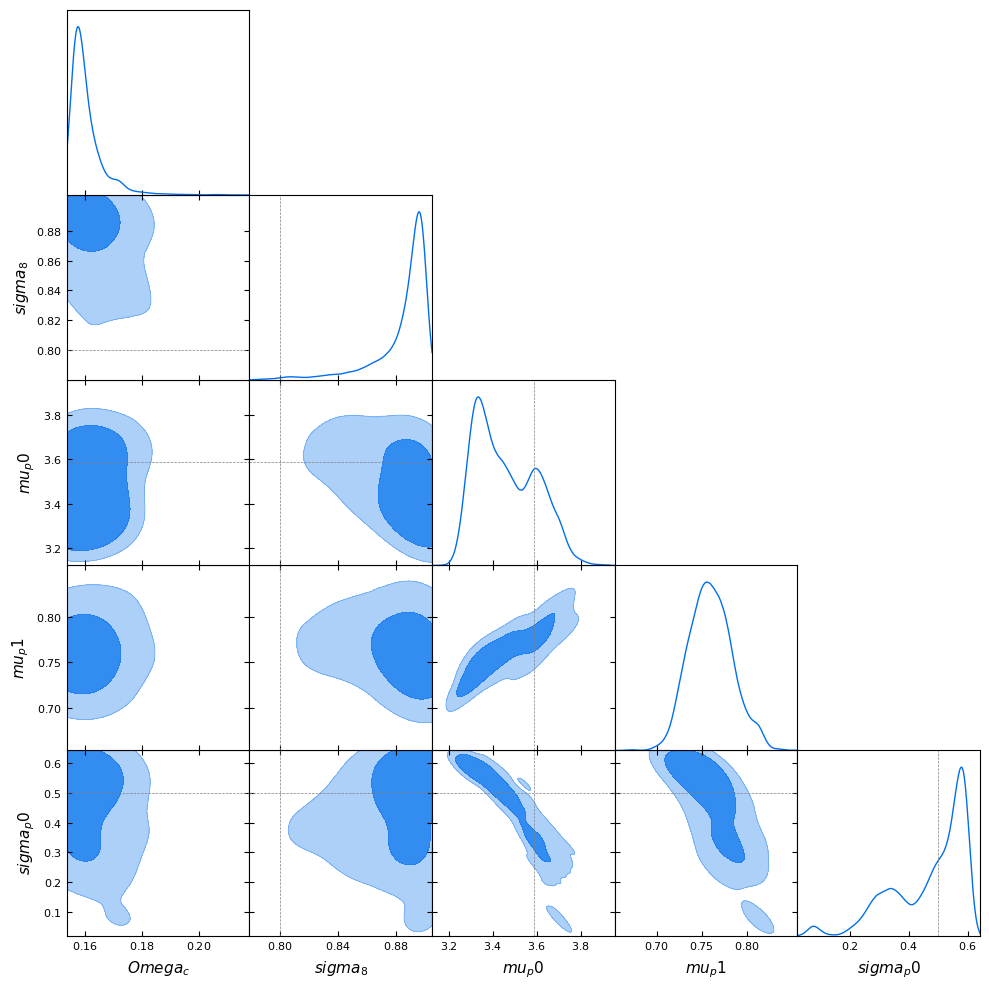

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_wazp_gaussian/cosmodc2_wazp_counts_nocp/outputs_mor/output_rp/number_counts_samples.txt
Removed no burn in
14000  samples


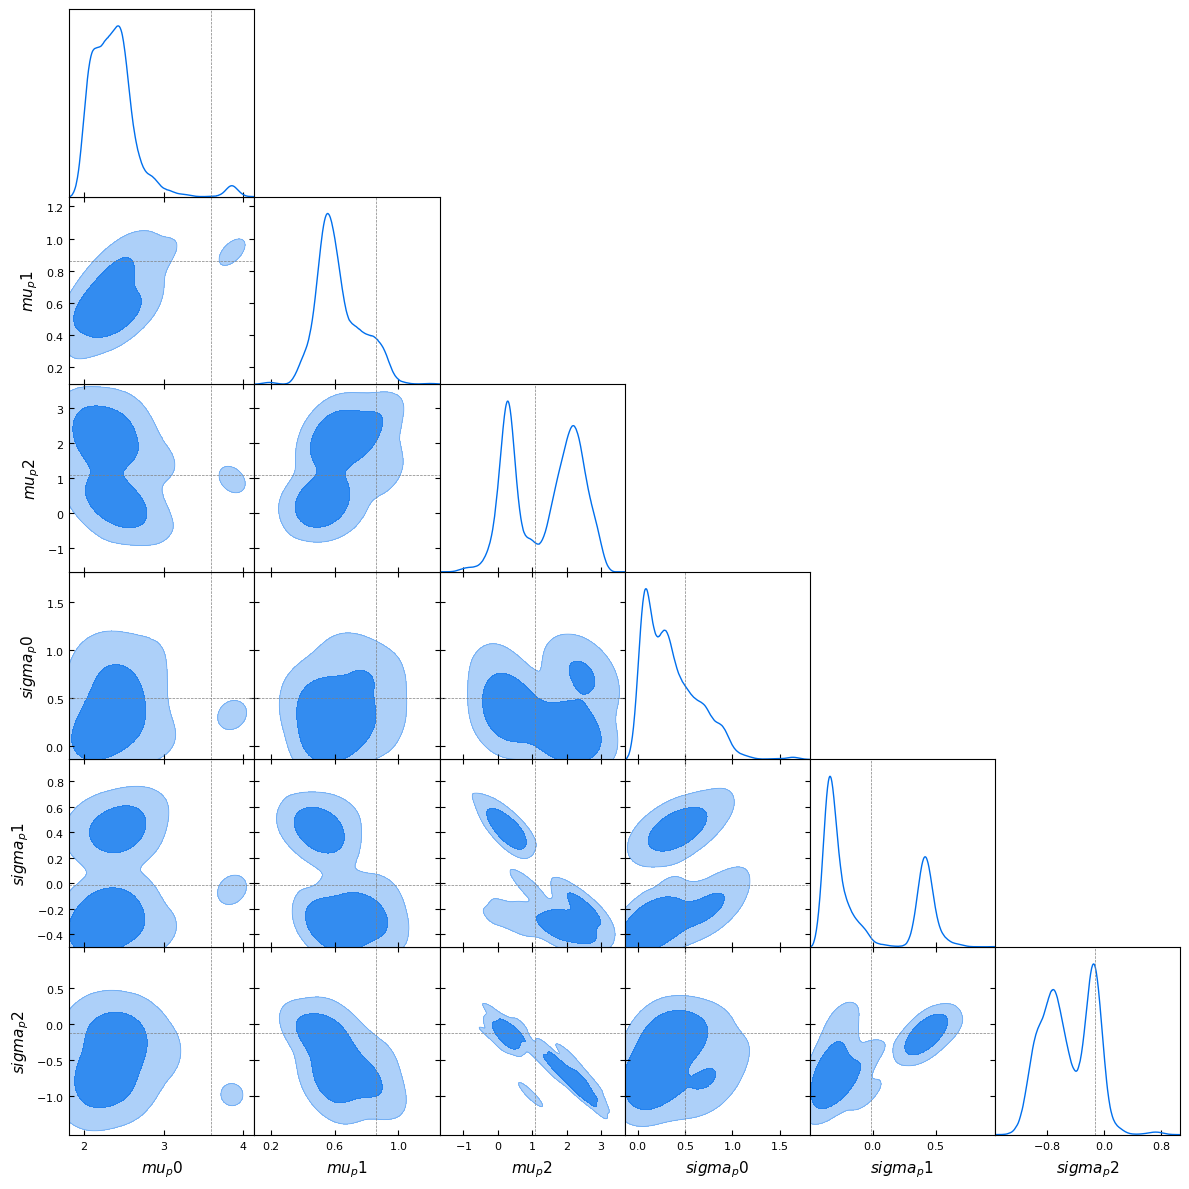

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_wazp_gaussian/cosmodc2_wazp_counts_nocp/outputs_cosmo/output_rp/number_counts_samples.txt
Removed no burn in
11900  samples


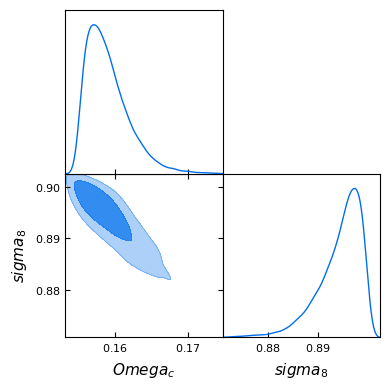

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[[np.float64(0.25522991323802596), np.float64(0.8502162693580976)],
 [np.float64(0.25518590221804893), np.float64(0.849892795137979)],
 [np.float64(0.25508997980379317), np.float64(0.8500868378066551)],
 [np.float64(0.25549803449362746), np.float64(0.8499721815856781)],
 [np.float64(0.25508761446268613), np.float64(0.8500364587458255)],
 [np.float64(0.25498155909106957), np.float64(0.8499201359936827)],
 [np.float64(0.2551951890230383), np.float64(0.849891338323703)],
 [np.float64(0.2553055312761131), np.float64(0.8495009348050842)],
 [np.float64(0.2549751809877102), np.float64(0.8500758653482656)],
 [np.float64(0.25503543889873287), np.float64(0.8500291975508589)],
 [np.float64(0.25502623910627015), np.float64(0.8500511292573616)],
 [np.float64(0.25517251262917245), np.float64(0.8498314091521981)],
 [np.float64(0.25503220853341674), np.float64(0.8500010257736098)],
 [np.float64(0.2551395906654263), np.float64(0.8497096241881732)],
 [np.float64(0.25516330546063615), np.float64(0.850165

In [54]:
###Change the home path to yours
home = '/sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_wazp_gaussian/cosmodc2_wazp_counts_nocp'

generate_triangle_plot(home + "/outputs_both/output_rp/number_counts_samples.txt", [
    ("Omega_c", 0.22),
    ("sigma_8", 0.800),
    ("mu_p0",3.58716),
    ("mu_p1", 0.861),
    ("sigma_p0", 0.5),
])

generate_triangle_plot(home + "/outputs_mor/output_rp/number_counts_samples.txt", [
    ("mu_p0",3.58716),
    ("mu_p1", 0.861),
    ("mu_p2", 1.07),
    ("sigma_p0", 0.5),
    ("sigma_p1", -0.0131),
    ("sigma_p2", -0.13137)
])

generate_triangle_plot(home + "/outputs_cosmo/output_rp/number_counts_samples.txt", [
    ("Omega_c", 0.22),
    ("sigma_8", 0.800),
])



LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_halos//outputs_both/output_rp/number_counts_samples.txt
Removed no burn in
70000  samples


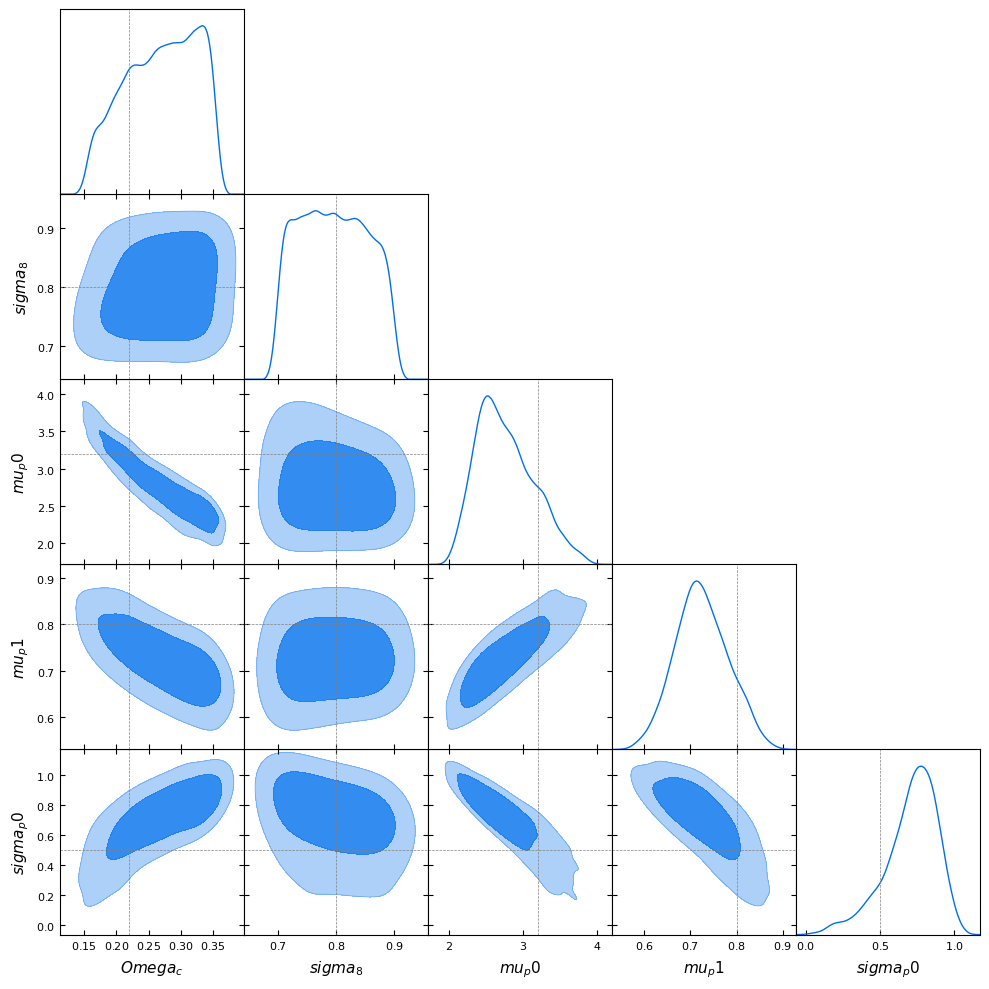

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_halos//outputs_mor/output_rp/number_counts_samples.txt
Removed no burn in
28000  samples


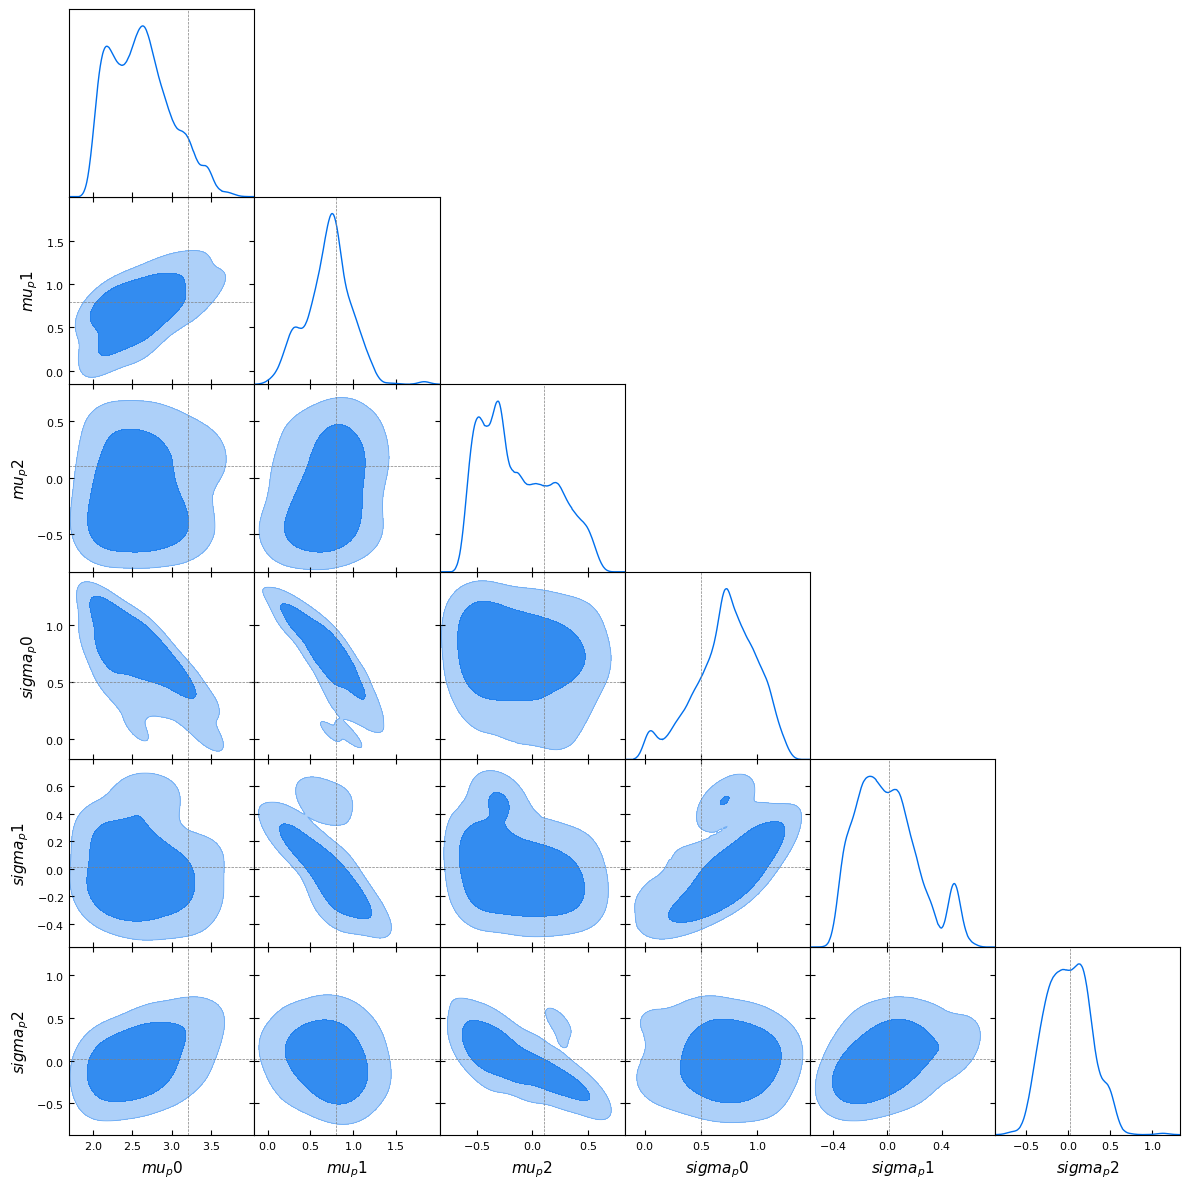

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_halos//outputs_cosmo/output_rp/number_counts_samples.txt
Removed no burn in
14000  samples


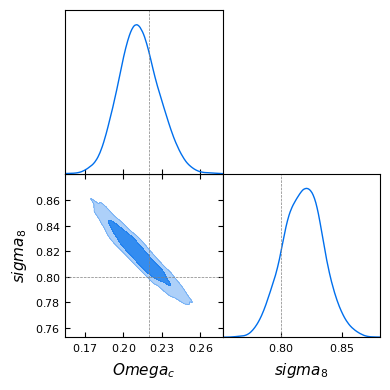

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[[np.float64(0.20527609919610093), np.float64(0.7998821939889255)],
 [np.float64(0.20575981967773962), np.float64(0.7999669286974063)],
 [np.float64(0.2052420434262471), np.float64(0.7998779072426967)],
 [np.float64(0.20524050778689581), np.float64(0.8000669993041066)],
 [np.float64(0.20505646978790992), np.float64(0.8001387462197614)],
 [np.float64(0.2052577661675355), np.float64(0.7998423498987786)],
 [np.float64(0.20516747504881147), np.float64(0.7999440723127188)],
 [np.float64(0.20521914854213733), np.float64(0.8000066009172373)],
 [np.float64(0.20501494579594462), np.float64(0.800478499252156)],
 [np.float64(0.2050438997299533), np.float64(0.8000490276310176)],
 [np.float64(0.20525180883121139), np.float64(0.7992545961632164)],
 [np.float64(0.20494743577203137), np.float64(0.8001179902157934)],
 [np.float64(0.20500141753865944), np.float64(0.8000963048670092)],
 [np.float64(0.20511536773680542), np.float64(0.7998610234624306)],
 [np.float64(0.2052845566557377), np.float64(0.80002

In [55]:
###Change the home path to yours
home = '/sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_halos/'

generate_triangle_plot(home + "/outputs_both/output_rp/number_counts_samples.txt", [
    ("Omega_c", 0.22),
    ("sigma_8", 0.800),
    ("mu_p0",3.2),
    ("mu_p1", 0.8),
    ("sigma_p0", 0.5),
])

generate_triangle_plot(home + "/outputs_mor/output_rp/number_counts_samples.txt", [
    ("mu_p0",3.2),
    ("mu_p1", 0.8),
    ("mu_p2", 0.1),
    ("sigma_p0", 0.5),
    ("sigma_p1", 0.01),
    ("sigma_p2", 0.02)
])

generate_triangle_plot(home + "/outputs_cosmo/output_rp/number_counts_samples.txt", [
    ("Omega_c", 0.22),
    ("sigma_8", 0.800),
])



LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_halos_true//outputs_mor/output_rp/number_counts_samples.txt
Removed no burn in
14700  samples


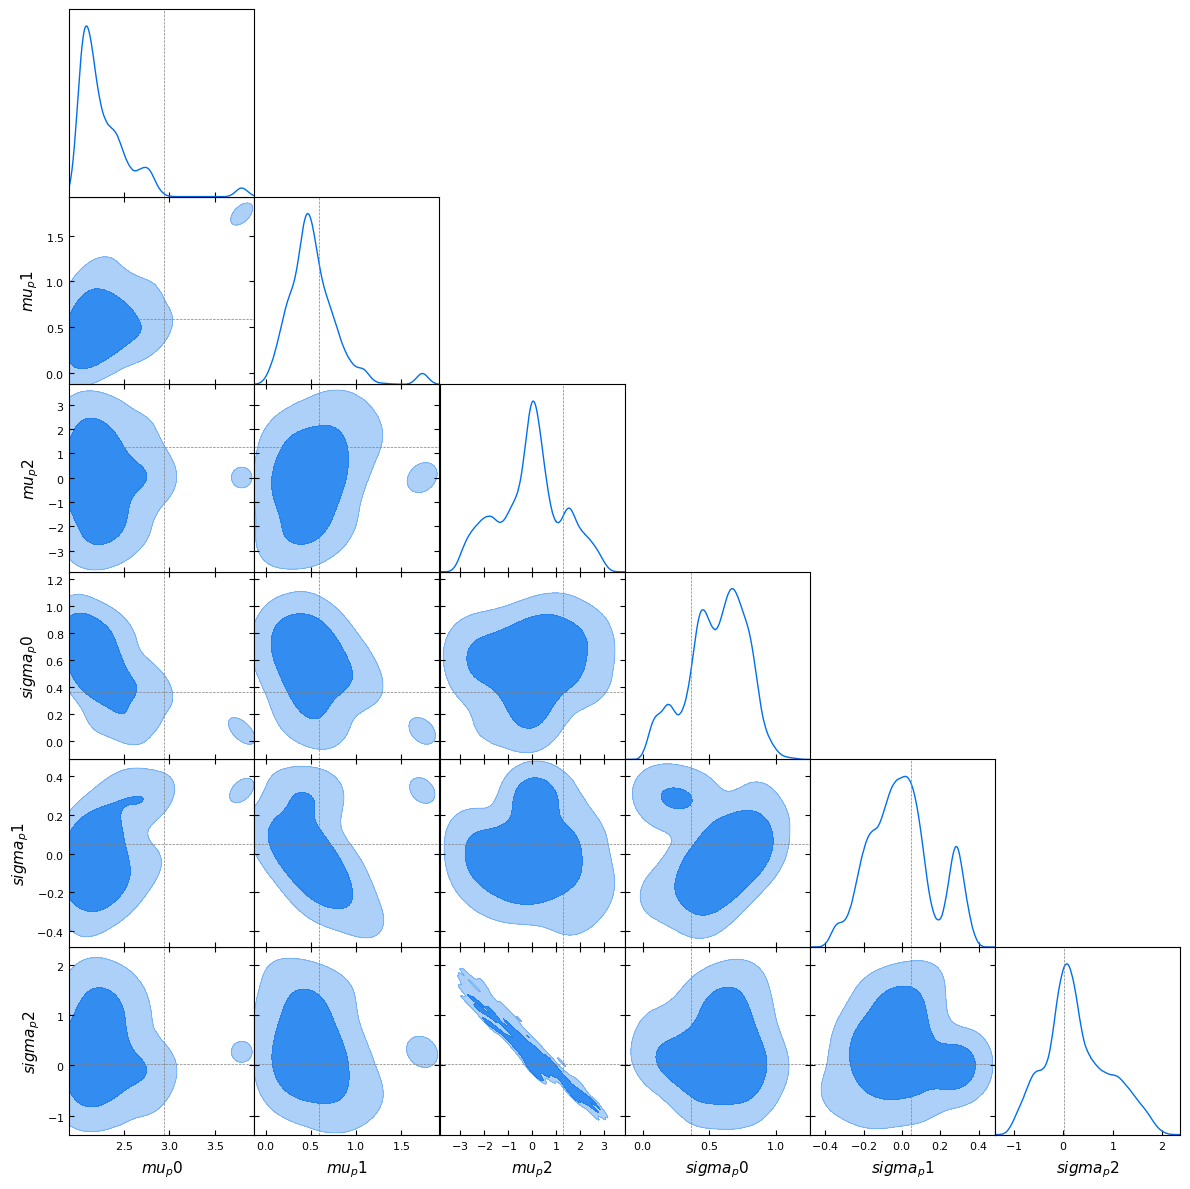

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_halos_true//outputs_both/output_rp/number_counts_samples.txt
Removed no burn in
15400  samples


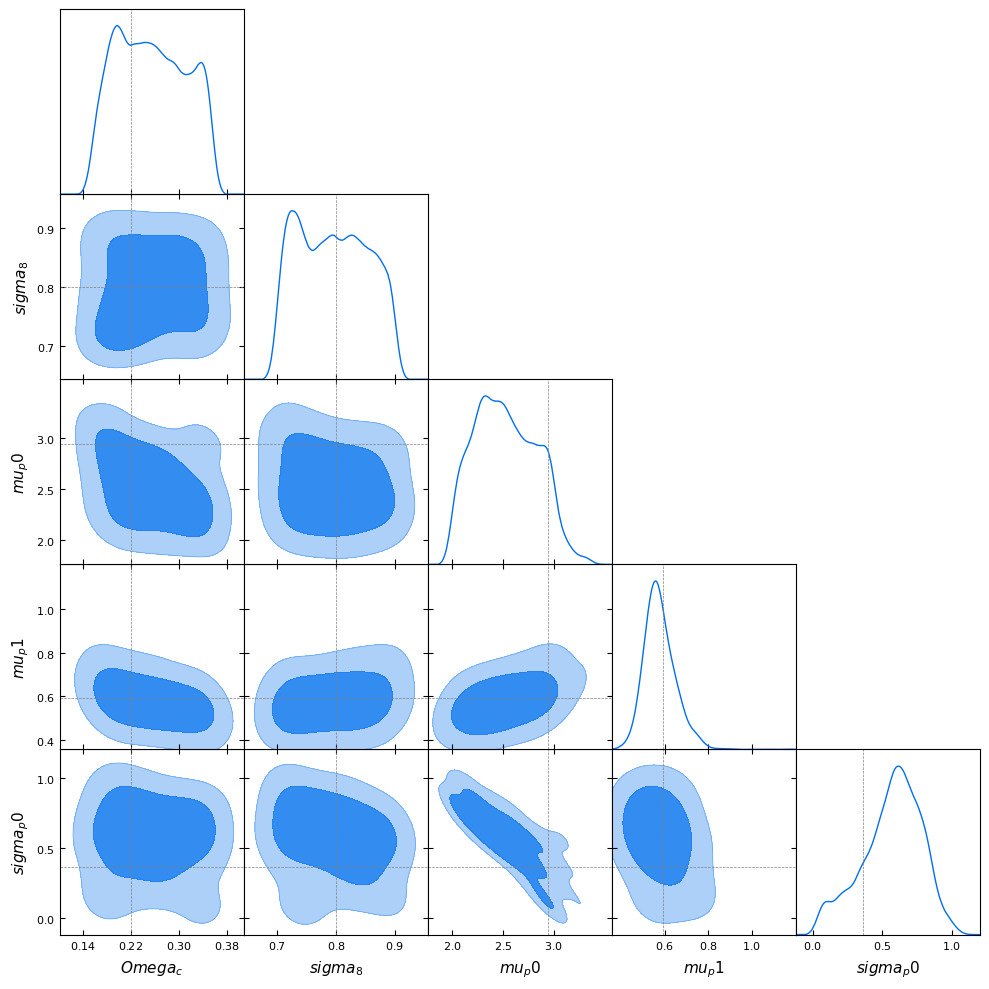

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_halos_true//outputs_cosmo/output_rp/number_counts_samples.txt
Removed no burn in
12600  samples


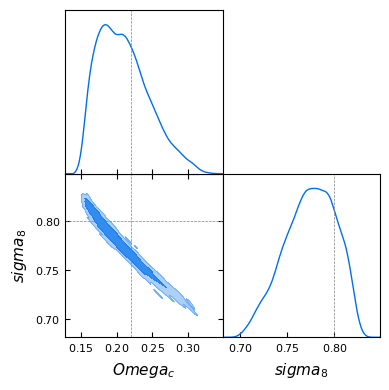

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[[np.float64(0.23508920439084563), np.float64(0.7999074677790105)],
 [np.float64(0.2349032362913164), np.float64(0.8003904837831929)],
 [np.float64(0.23517207079042793), np.float64(0.7998153750925905)],
 [np.float64(0.23530010576346552), np.float64(0.8002398329998406)],
 [np.float64(0.23538688737448873), np.float64(0.7997185138895296)],
 [np.float64(0.23477498848642764), np.float64(0.7996833598918438)],
 [np.float64(0.23531046942925468), np.float64(0.8000908074687187)],
 [np.float64(0.2353248962769329), np.float64(0.7999850625389752)],
 [np.float64(0.23518975922609064), np.float64(0.8004081186778464)],
 [np.float64(0.2351883001686642), np.float64(0.8000504462732105)],
 [np.float64(0.2352344876620002), np.float64(0.8003610448933329)],
 [np.float64(0.2352424680888709), np.float64(0.7996831660826579)],
 [np.float64(0.2352994402412365), np.float64(0.8001543511622146)],
 [np.float64(0.2353863491844138), np.float64(0.7999872757078349)],
 [np.float64(0.23509687085157271), np.float64(0.8001563

In [56]:
###Change the home path to yours
home = '/sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_halos_true/'



generate_triangle_plot(home + "/outputs_mor/output_rp/number_counts_samples.txt", [
    ("mu_p0",2.9386),
    ("mu_p1", 0.5923),
    ("mu_p2", 1.2734),
    ("sigma_p0", 0.3626),
    ("sigma_p1", 0.0483),
    ("sigma_p2", 0.0284)
])

generate_triangle_plot(home + "/outputs_both/output_rp/number_counts_samples.txt", [
    ("Omega_c", 0.22),
    ("sigma_8", 0.800),
   ("mu_p0",2.9386),
    ("mu_p1", 0.5923),
    ("sigma_p0", 0.3626),
])



generate_triangle_plot(home + "/outputs_cosmo/output_rp/number_counts_samples.txt", [
    ("Omega_c", 0.22),
    ("sigma_8", 0.800),
])




In [64]:
from crow.recipes.binned_exact import ExactBinnedClusterRecipe
from crow.recipes.binned_grid import GridBinnedClusterRecipe
from crow.cluster_modules.mass_proxy import MurataUnbinned, MurataBinned
from crow.cluster_modules.kernel import SpectroscopicRedshift
from crow.cluster_modules.completeness_models import CompletenessAguena16
from crow.cluster_modules.purity_models import PurityAguena16
from crow import ClusterAbundance
#from firecrown.models.cluster import ClusterProperty
from crow.properties import ClusterProperty
import time
import numpy as np

from scipy.integrate import dblquad, tplquad, simpson

In [65]:
import pyccl as ccl
hmf = ccl.halos.MassFuncDespali16(mass_def="200c")
cosmo = ccl.Cosmology(
    Omega_c=0.2607,      # Cold dark matter density
    Omega_b=0.04897,     # Baryon density
    h=0.6766,            # Hubble parameter
    sigma8=0.8102,       # Matter fluctuation amplitude
    n_s=0.9665,          # Spectral index
)

#cl_delta_sigma.vectorized= True
cl_abundance = ClusterAbundance(cosmo=cosmo, halo_mass_function=hmf)
pivot_mass, pivot_redshift = 14.625862906, 0.6
comp_dist = CompletenessAguena16()
pur_dist = PurityAguena16()
mass_distribution = MurataUnbinned(pivot_mass, pivot_redshift)
mass_distribution_binned = MurataBinned(pivot_mass, pivot_redshift)
redshift_distribution = SpectroscopicRedshift()



In [66]:
##### Parameters to be used in both recipes #####
mass_grid_size = 60
redshift_grid_size = 20
proxy_grid_size = 20
sky_area = 440
mass_interval = (12.5, 15.0)
cluster_theory = cl_abundance
z_bin = (0.2, 0.4)
z_points = np.linspace(z_bin[0], z_bin[1], redshift_grid_size) 
proxy_bin = (1.0, 1.3)
proxy_points = np.linspace(proxy_bin[0], proxy_bin[1], proxy_grid_size)
radius_center = np.array([4.0])
#################################################

recipe_integral = ExactBinnedClusterRecipe(
        mass_interval=mass_interval,
        cluster_theory=cluster_theory,
        redshift_distribution=redshift_distribution,
        mass_distribution=mass_distribution_binned,
        completeness=comp_dist,
    )

recipe_grid = GridBinnedClusterRecipe(
        mass_interval=mass_interval,
        cluster_theory=cluster_theory,
        redshift_distribution=redshift_distribution,
        mass_distribution=mass_distribution,
        completeness=comp_dist,
    proxy_grid_size=proxy_grid_size,
    redshift_grid_size=redshift_grid_size,
    mass_grid_size=mass_grid_size,
    )

In [67]:
print(recipe_integral.evaluate_theory_prediction_counts())

TypeError: ExactBinnedClusterRecipe.evaluate_theory_prediction_counts() missing 3 required positional arguments: 'z_edges', 'log_proxy_edges', and 'sky_area'